In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import keras

from keras.models import load_model
from keras.layers import Embedding, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense

np.set_printoptions(precision=4, suppress=True)

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../datas.csv', sep=',', index_col='id')

subjects = ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'programming',
            'stat', 'pde', 'functional', 'variational', 'random_proc', 'numerical']
years = [13, 14, 15, 16, 17]

df['mean'] = df[subjects].mean(axis=1)
df['round'] = np.rint(df['mean'].values)

df.loc[df['year'] == 13, 'k'] = 0.8
df.loc[df['year'] == 14, 'k'] = 0.5
df.loc[df['year'] >= 15, 'k'] = 0.3

In [3]:
train_df = df.loc[df['year'] <= 15]

x_train = train_df[['k', 'ege']].values
y_train = train_df['round'].values - 3

test_df = df.loc[df['year'] > 15]
x_test = test_df[['k', 'ege']].values
y_test = test_df['round'].values - 3

x_additional = np.array([
    [0.8, 243], [0.8, 239], [0.8, 237], [0.8, 235], [0.8, 234], [0.8, 233], [0.8, 232], [0.8, 231], 
    [0.8, 230], [0.8, 229], [0.8, 228], [0.8, 227], [0.8, 226], [0.8, 225], [0.8, 224], [0.8, 223], 
    [0.8, 222], [0.8, 221], [0.8, 220], [0.8, 219], 
    [0.5, 235], [0.5, 220], [0.5, 218], [0.5, 217], [0.5, 215], [0.5, 214], [0.5, 213], [0.5, 210], 
    [0.5, 209], [0.5, 207], [0.5, 206], [0.5, 205], [0.5, 203], [0.5, 200], [0.5, 199], [0.5, 195], 
    [0.5, 193], [0.5, 192], [0.5, 191], [0.5, 190], 
    [0.3, 244], [0.3, 222], [0.3, 215], [0.3, 213], [0.3, 211], [0.3, 209], [0.3, 206], [0.3, 205], 
    [0.3, 204], [0.3, 203], [0.3, 202], [0.3, 201], [0.3, 200], [0.3, 199], [0.3, 197], [0.3, 196], 
    [0.3, 194], [0.3, 193], [0.3, 191], [0.3, 191]
])
y_additional = np.array([
    2,2,2,2,2,2,1,1,1,1,1,1,1,1,0,0,0,0,0,0,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,0,0,0,0,0,2,2,2,1,1,1,1,
    1,1,1,1,1,1,1,1,0,0,0,0,0])

x = np.concatenate((x_train, x_additional), axis=0)
y = np.concatenate((y_train, y_additional), axis=0)

In [62]:
# model = load_model("enrollee_acc_85_believable.h5")

In [63]:
# model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 2)           2048      
_________________________________________________________________
lstm_13 (LSTM)               (None, 128)               67072     
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 387       
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 12        
Total params: 69,519
Trainable params: 69,519
Non-trainable params: 0
_________________________________________________________________


In [4]:
max_features = 1024

model = Sequential()

model.add(Embedding(max_features, output_dim=2))
model.add(LSTM(128))
model.add(Dense(3, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['categorical_accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=3)
history = model.fit(x_train, one_hot_labels, epochs=200, batch_size=20, verbose=1, shuffle=False)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
60/60 [==============================] - 1s 21ms/step - loss: 1.0943 - categorical_accuracy: 0.4667
Epoch 2/200
60/60 [==============================] - 0s 411us/step - loss: 1.0833 - categorical_accuracy: 0.5000
Epoch 3/200
60/60 [==============================] - 0s 263us/step - loss: 1.0733 - categorical_accuracy: 0.5000
Epoch 4/200
60/60 [==============================] - 0s 184us/step - loss: 1.0625 - categorical_accuracy: 0.5000
Epoch 5/200
60/60 [==============================] - 0s 320us/step - loss: 1.0510 - categorical_accuracy: 0.5000
Epoch 6/200
60/60 [==============================] - 0s 295us/step - loss: 1.0387 - categorical_accuracy: 0.5000
Epoch 7/200
60/60 [==============================] - 0s 343us/step - loss: 1.0257 - categorical_accuracy: 0.5000
Epoch 8/200
60/60 [==============================] - 0s 227us/step - loss: 1.0124 - categorical_accuracy: 0.5000
Epoch 9/200
60/60 [==============================

60/60 [==============================] - 0s 223us/step - loss: 0.8564 - categorical_accuracy: 0.5000
Epoch 71/200
60/60 [==============================] - 0s 201us/step - loss: 0.8539 - categorical_accuracy: 0.5000
Epoch 72/200
60/60 [==============================] - 0s 144us/step - loss: 0.8513 - categorical_accuracy: 0.5000
Epoch 73/200
60/60 [==============================] - 0s 195us/step - loss: 0.8486 - categorical_accuracy: 0.5000
Epoch 74/200
60/60 [==============================] - 0s 189us/step - loss: 0.8469 - categorical_accuracy: 0.5000
Epoch 75/200
60/60 [==============================] - 0s 154us/step - loss: 0.8430 - categorical_accuracy: 0.5000
Epoch 76/200
60/60 [==============================] - 0s 195us/step - loss: 0.8401 - categorical_accuracy: 0.5000
Epoch 77/200
60/60 [==============================] - 0s 178us/step - loss: 0.8371 - categorical_accuracy: 0.5000
Epoch 78/200
60/60 [==============================] - 0s 148us/step - loss: 0.8340 - categorical_accu

60/60 [==============================] - 0s 156us/step - loss: 0.4186 - categorical_accuracy: 0.8833
Epoch 142/200
60/60 [==============================] - 0s 212us/step - loss: 0.4115 - categorical_accuracy: 0.8833
Epoch 143/200
60/60 [==============================] - 0s 138us/step - loss: 0.4046 - categorical_accuracy: 0.8833
Epoch 144/200
60/60 [==============================] - 0s 155us/step - loss: 0.3980 - categorical_accuracy: 0.8833
Epoch 145/200
60/60 [==============================] - 0s 144us/step - loss: 0.3915 - categorical_accuracy: 0.8833
Epoch 146/200
60/60 [==============================] - 0s 161us/step - loss: 0.3852 - categorical_accuracy: 0.9000
Epoch 147/200
60/60 [==============================] - 0s 191us/step - loss: 0.3790 - categorical_accuracy: 0.9000
Epoch 148/200
60/60 [==============================] - 0s 144us/step - loss: 0.3731 - categorical_accuracy: 0.9000
Epoch 149/200
60/60 [==============================] - 0s 149us/step - loss: 0.3674 - categori

In [21]:
df_16 = df.loc[df['year'] == 16][['ege', 'k', 'round']]
x_test_16 = df_16[['k', 'ege']].values
y_test_16 = df_16['round'].values - 3

one_hot_labels_16 = keras.utils.to_categorical(y_test_16, num_classes=3)

loss_and_metrics_16 = model.evaluate(x_test_16, one_hot_labels_16)
print("2016")
print(loss_and_metrics_16)

df_17 = df.loc[df['year'] == 17][['ege', 'k', 'round']]
x_test_17 = df_17[['k', 'ege']].values
y_test_17 = df_17['round'].values - 3

one_hot_labels_17 = keras.utils.to_categorical(y_test_17, num_classes=3)

loss_and_metrics_17 = model.evaluate(x_test_17, one_hot_labels_17)

print("2017")
print(loss_and_metrics_17)

20/20 [==============================] - 0s 53us/step
2016
[2.357116460800171, 0.699999988079071]
20/20 [==============================] - 0s 40us/step
2017
[2.776129961013794, 0.550000011920929]


Text(0.5, 0, 'Эпоха')

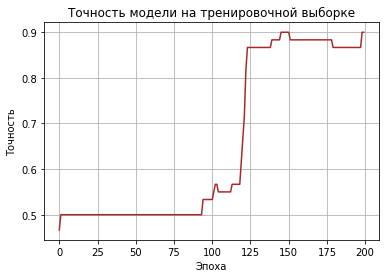

In [14]:
plt.plot(history.history['categorical_accuracy'], color='brown')
plt.grid()
plt.title('Точность модели на тренировочной выборке')
plt.ylabel('Точность')
plt.xlabel('Эпоха')
# plt.savefig('enrollee_acc.png', dpi=300)

Text(0.5, 0, 'Эпоха')

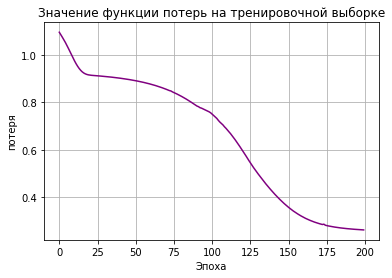

In [15]:
plt.plot(history.history['loss'], color='purple')
plt.grid()
plt.title('Значение функции потерь на тренировочной выборке')
plt.ylabel('потеря')
plt.xlabel('Эпоха')
# plt.savefig('enrollee_loss.png', dpi=300)

### Пронозирование успеваемости абитуриентов за 2016 год

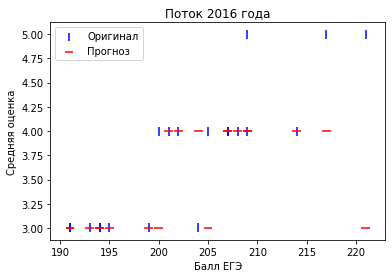

In [18]:
df_16 = df.loc[df['year'] == 16][['ege', 'k', 'round']]
x_test_16 = df_16[['k', 'ege']].values
y_test_16 = df_16['round'].values - 3

y_predict_16 = model.predict(x_test_16)
y_predict_16 = list(map(lambda y : y.argmax()+3, y_predict_16))

marker_size = [80 for i in range(len(x))]

plt.scatter(x_test_16[:, 1], y_test_16+3, marker='|', color='blue', s=marker_size)
plt.scatter(x_test_16[:, 1], y_predict_16, marker='_', color='red', s=marker_size)

plt.title('Поток 2016 года')
plt.xlabel('Балл ЕГЭ')
plt.ylabel('Средняя оценка')
plt.legend(['Оригинал', 'Прогноз']);
plt.savefig('enrollee_predict_2016.png', dpi=300)

### Пронозирование успеваемости абитуриентов за 2017 год

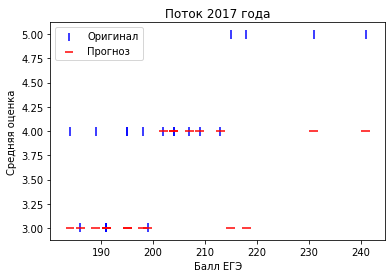

In [19]:
df_17 = df.loc[df['year'] == 17][['ege', 'k', 'round']]
x_test_17 = df_17[['k', 'ege']].values
y_test_17 = df_17['round'].values - 3

y_predict_17 = model.predict(x_test_17)
y_predict_17 = list(map(lambda y : y.argmax()+3, y_predict_17))

marker_size = [80 for i in range(len(x))]

plt.scatter(x_test_17[:, 1], y_test_17+3, marker='|', color='blue', s=marker_size)
plt.scatter(x_test_17[:, 1], y_predict_17, marker='_', color='red', s=marker_size)

plt.title('Поток 2017 года')
plt.xlabel('Балл ЕГЭ')
plt.ylabel('Средняя оценка')
plt.legend(['Оригинал', 'Прогноз']);
plt.savefig('enrollee_predict_2017.png', dpi=300)

In [12]:
model.save('enrollee_acc_90_believable.h5')